# Supervised learning for a single neuron applied to MNIST
## Delta rule for a binary classification task

This code uses `torch` only for numerical linear algebra.\
The gradient learning (delta rule) is implemented by hand for pedagogical purposes.

## Preliminaries

In [1]:
import torch
from torchvision import datasets
import matplotlib.pyplot as plt
from IPython import display

# display plots inline (in the notebook rather than another window)
%matplotlib inline

#plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.cmap'] = 'hot'

torch.manual_seed(485)        # manually seed the random number generator (useful if you want reproducible experiments)

#### Read in the training data

In [2]:
mnist = datasets.MNIST(root='data', train=True, download=True) # train data only
trainimages = mnist.data
trainlabels = mnist.targets

100%|██████████| 9912422/9912422 [00:00<00:00, 90289728.42it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 5928434.09it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29076570.61it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2845486.00it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



#### other parameters and arrays for keeping track of performance

In [3]:
tmax, nrow, ncol = trainimages.size()
errcl = torch.zeros(tmax)    # classification error vs. time
entropy = torch.zeros(tmax)   # cross entropy loss vs. time

eta = 0.01  # learning rate parameter (controls length of gradient step)

#### Visualization
This visualization function is called by the main training loop below.

If you'd like to run through the entire training set quickly, set `tshow` to 1000.\
If you'd like to visualize every update, set `tshow` to 1, but training will be slow.\
You will be able to see how every iteration adds some multiple of the input vector to the weight vector.

In [4]:
tshow = 1000   # how often to pause and plot

def viz(w, x, errcl, entropy):
    plt.subplot(2, 2, 1)
    plt.matshow(w.view(nrow, ncol), fignum = False)
    plt.axis('off')
    plt.title("weight vector")

    plt.subplot(2, 2, 2)
    plt.matshow(x.view(nrow, ncol), fignum = False)
    plt.axis('off')
    plt.title("input vector")

    plt.subplot(2, 2, 3)
    plt.plot(torch.cumsum(errcl, dim=0)/(1+torch.arange(len(errcl))))
    plt.title("classification error")

    plt.subplot(2, 2, 4)
    plt.plot(torch.cumsum(entropy, dim=0)/(1+torch.arange(len(entropy))))
    plt.title("cross entropy loss")

    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()

#### Initialize the weight vector and bias
We are initializing all weights and the bias to be zero. That's OK for a single neuron or layer of neurons.
It won't be OK for a multilayer network, as we'll find out later on.

In [5]:
w = torch.zeros(nrow*ncol)
b = torch.zeros(())

## Train a neuron to be a "two"-detector

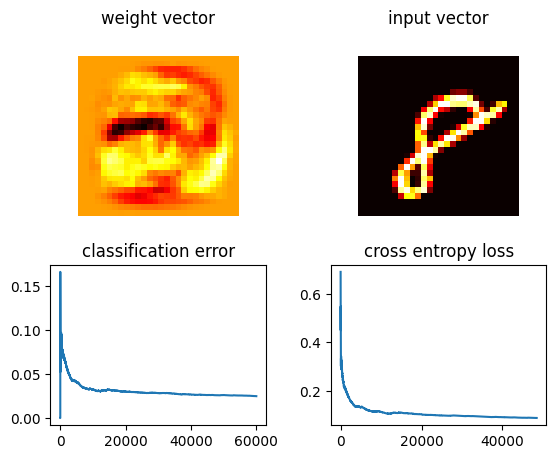

Averaged over the last 1000 examples, the classification error was 0.015 and the cross entropy was 0.044


<Figure size 640x480 with 0 Axes>

In [6]:
for t in range(tmax):     # iterate through the training examples
    x = trainimages[t]/255              # normalize max value to one
    x = x.view(-1)                    # flatten 2D image into vector
    desired = (trainlabels[t] == 2).float()  # desired label is 1 for a "two" and 0 otherwise.
    actual = torch.sigmoid(torch.dot(w, x) + b) # actual output of neuron
    delta = desired - actual
    w += eta * delta * x                       # weight update of delta rule
    b += eta * delta                           # bias update of delta rule

    errcl[t] = desired != (actual > 0.5)           # error of deterministic prediction
    entropy[t] = - desired*torch.log(actual) - (1 - desired)*torch.log(1 - actual)    # cross entropy loss

    if (t+1) % tshow == 0:    # plot after waiting twait steps
        viz(w, x, errcl[:t], entropy[:t])

print(f'Averaged over the last 1000 examples, \
the classification error was {torch.mean(errcl[-1000:-1]):.3f} \
and the cross entropy was {torch.mean(entropy[-1000:-1]):.3f}')

## Exercises

#### Trivial baselines
Is the performance above good or bad? It’s often helpful to compare with the performance of simple “baseline” models. \
For example, a simple baseline here is the trivial recognition algorithm that always returns an output of 0 for any input image. \
What would be the classification error for this always-0 algorithm, averaged over all examples?

The performance is good. For an always-0 algorithm, the classification error would be about 10% (it would be incorrect for all the 2's in the dataset), but our model has a classification error of 1.5%.


What would be the cross entropy loss for this always-0 algorithm, averaged over all examples?

The cross entropy loss for an always-0 algorithm would be infinity because the
log of 0 (where 0 is the probability of the correct class)is negative infinity (which we then would need to negate again).

If probabilistic prediction is allowed, another trivial algorithm would be to return an probability of 0.1 for any input.\
What would be the cross entropy loss for this algorithm, averaged over all examples?

The cross entropy loss would be about -log(0.1). (which would be equal to 1 if it is log base 10)

### Evaluate performance on the test set.

Load the test set of 10,000 images

In [7]:
mnist_test = datasets.MNIST(root='data', train=False, download=True) # test data only
testimages = mnist_test.data
testlabels = mnist_test.targets

Write your own code to evaluate the performance of the trained neuron on the test set.\
Compute the classification error and the binary cross entropy loss.\
For the latter, you can define your own cross entropy as in the training code above,\
or you can use [`torch.nn.functional.binary_cross_entropy`](https://pytorch.org/docs/stable/generated/torch.nn.functional.binary_cross_entropy.html).

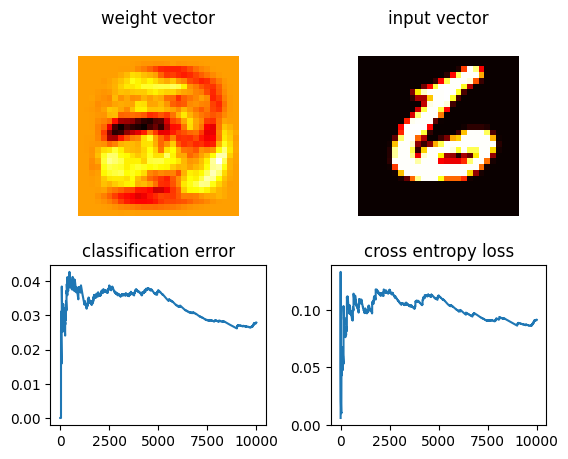

Averaged over the last 1000 examples, the classification error was 0.043 and the cross entropy was 0.138


<Figure size 640x480 with 0 Axes>

In [8]:
tmax, nrow, ncol = testimages.size()
errcl = torch.zeros(tmax)    # classification error vs. time
entropy = torch.zeros(tmax)   # cross entropy loss vs. time
eta = 0.01  # learning rate parameter (controls length of gradient step)


for t in range(tmax):     # iterate through the training examples
    x = testimages[t]/255              # normalize max value to one
    x = x.view(-1)                    # flatten 2D image into vector
    desired = (testlabels[t] == 2).float()  # desired label is 1 for a "two" and 0 otherwise.
    actual = torch.sigmoid(torch.dot(w, x) + b) # actual output of neuron
    errcl[t] = desired != (actual > 0.5)           # error of deterministic prediction
    entropy[t] = - desired*torch.log(actual) - (1 - desired)*torch.log(1 - actual)    # cross entropy loss

    if (t+1) % tshow == 0:    # plot after waiting twait steps
        viz(w, x, errcl[:t], entropy[:t])

print(f'Averaged over the last 1000 examples, \
the classification error was {torch.mean(errcl[-1000:-1]):.3f} \
and the cross entropy was {torch.mean(entropy[-1000:-1]):.3f}')
